In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import numpy as np

In [3]:
# data from generated lane change
data = [
16000000000,
16000000000,
12000000000,
11000000000,
14000000000,
28100000000,
28500000000,
28200000000,
16000000000,
16000000000]
# manually manipulated data
""" data = [
16000000000,
16000000000,
12000000000,
11000000000,
13000000000,
28100000000,
28500000000,
28200000000,
16000000000,
16000000000] """

  
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(data, columns=['morton'])

df[['IMULatAcceleration', 'SteeringWhlAngle']] = 0

# specify morton encoding
m = morton.Morton(dimensions=2, bits=18)

# iterate through df_morton_analysis
for i in range(0, len(df.index)):
    # extract current sensor_values
    sensor_values = m.unpack(int(df.loc[i,['morton']]))
    # put sensor_values in appropriate column and index
    df.loc[i, ['IMULatAcceleration']] = sensor_values[0]
    df.loc[i, ['SteeringWhlAngle']] = sensor_values[1]

df

,morton,IMULatAcceleration,SteeringWhlAngle
0,16000000000,86528,126656
1,16000000000,86528,126656
2,12000000000,39360,110688
3,11000000000,12832,114160
4,14000000000,102176,70944
5,28100000000,133584,114144
6,28500000000,132592,122720
7,28200000000,150976,101040
8,16000000000,86528,126656
9,16000000000,86528,126656


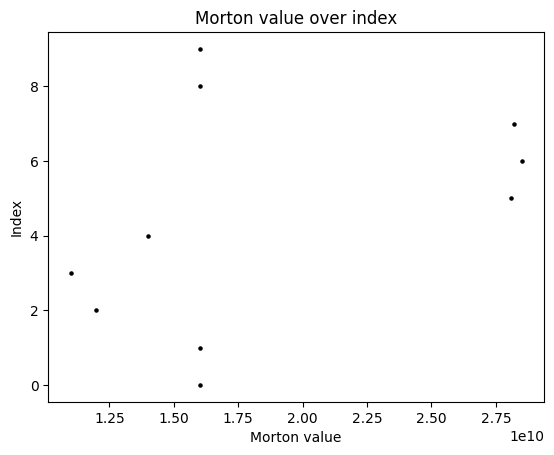

In [13]:
plt.scatter(x=df['morton'],y=df.index, c='black', s=5)
plt.title("Morton value over index")
plt.xlabel("Morton value")
plt.ylabel("Index")
plt.show()

In [10]:
OFFSET = 10
FACTOR_MULTIPLY = 10000


df['IMULatAcceleration'] = df.apply(lambda x: (x['IMULatAcceleration']/FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: (x['SteeringWhlAngle']/FACTOR_MULTIPLY) , axis=1)

df['IMULatAcceleration']=df['IMULatAcceleration'].add(-OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(-OFFSET)

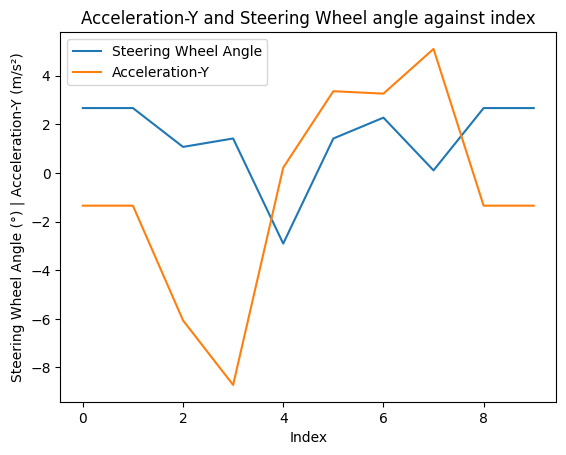

In [12]:
ax = df.plot(y=['SteeringWhlAngle', 'IMULatAcceleration'])
ax.set_xlabel('Index')
ax.set_ylabel('Steering Wheel Angle (°) | Acceleration-Y (m/s\u00B2)')
ax.set_title('Acceleration-Y and Steering Wheel angle against index')
ax.legend(['Steering Wheel Angle', 'Acceleration-Y'])